# Introduction and Problem Statement

**Submitted By:** Swetha Srinivasan

**Email ID:** ss9577@rit.edu

**FABRICATING AN ENSEMBLE OF MACHINE LEARNING MODELS TO PREDICT FOREST COVER TYPES **

Develop a machine learning model to predict the forest cover type based on various features such as elevation, slope, and soil type

**Dataset:**

[Forest CovType Dataset - sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_covtype.html#sklearn.datasets.fetch_covtype)

# Data Exploration and Visualization

In [1]:
#Importing necessary libraries
from sklearn.datasets import fetch_covtype
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
# Load the Forest Cover Types dataset
cover_types = fetch_covtype()

Problem Statement :




In [3]:
# Create a DataFrame
data = pd.DataFrame(cover_types.data, columns=[f'feature_{i}' for i in range(1, 55)])
data['target'] = cover_types.target
unique_classes = data['target'].unique()

In [4]:
# Display information about the dataset
print("Number of samples:", data.shape[0])
print()
print("Number of features:", data.shape[1] - 1)  # Subtract 1 for the target variable
print()
print("Unique classes", unique_classes)
print()
print("Class distribution:\n\n", data['target'].value_counts())


Number of samples: 581012

Number of features: 54

Unique classes [5 2 1 7 3 6 4]

Class distribution:

 2    283301
1    211840
3     35754
7     20510
6     17367
5      9493
4      2747
Name: target, dtype: int64


In [5]:
#To show the first 5 rows of the dataset
data.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_46,feature_47,feature_48,feature_49,feature_50,feature_51,feature_52,feature_53,feature_54,target
0,2596.0,51.0,3.0,258.0,0.0,510.0,221.0,232.0,148.0,6279.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
1,2590.0,56.0,2.0,212.0,-6.0,390.0,220.0,235.0,151.0,6225.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
2,2804.0,139.0,9.0,268.0,65.0,3180.0,234.0,238.0,135.0,6121.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
3,2785.0,155.0,18.0,242.0,118.0,3090.0,238.0,238.0,122.0,6211.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
4,2595.0,45.0,2.0,153.0,-1.0,391.0,220.0,234.0,150.0,6172.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5


In [6]:
# Handling missing values
# Checking missing value count

for j in range(len(data.columns)):
    data.iloc[:,j]=data.iloc[:,j].fillna(data.iloc[:,j].mean())

data.isnull().sum()

feature_1     0
feature_2     0
feature_3     0
feature_4     0
feature_5     0
feature_6     0
feature_7     0
feature_8     0
feature_9     0
feature_10    0
feature_11    0
feature_12    0
feature_13    0
feature_14    0
feature_15    0
feature_16    0
feature_17    0
feature_18    0
feature_19    0
feature_20    0
feature_21    0
feature_22    0
feature_23    0
feature_24    0
feature_25    0
feature_26    0
feature_27    0
feature_28    0
feature_29    0
feature_30    0
feature_31    0
feature_32    0
feature_33    0
feature_34    0
feature_35    0
feature_36    0
feature_37    0
feature_38    0
feature_39    0
feature_40    0
feature_41    0
feature_42    0
feature_43    0
feature_44    0
feature_45    0
feature_46    0
feature_47    0
feature_48    0
feature_49    0
feature_50    0
feature_51    0
feature_52    0
feature_53    0
feature_54    0
target        0
dtype: int64

In [7]:
#Import necessary libraries

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
# Split the data into features (X) and target variable (y)
X = data.drop('target', axis=1)
y = data['target']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Standard Scalar
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply PCA
# Since the dataset has 54 features, I have reduced it to 10 features in order to ease the prediction
pca = PCA(n_components=10)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.fit_transform(X_test_scaled)

y_train_pca = y_train
y_test_pca = y_test

# Create a new DataFrame with the PCA components and target
pca_df = pd.DataFrame(data=X_train_pca, columns=['feature_a', 'feature_b', 'feature_c', 'feature_d', 'feature_e', 'feature_f', 'feature_g', 'feature_h', 'feature_i', 'feature_j' ])
pca_df['target'] = y_train_pca.astype('category')

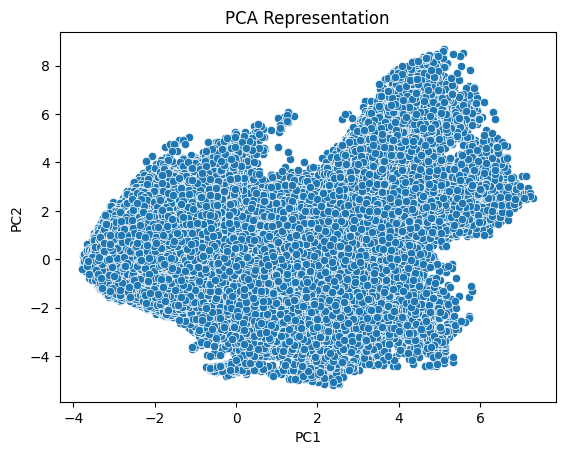

In [9]:
# Create a DataFrame for easy plotting
df_pca = pd.DataFrame(data=X_train_pca, columns=[f'PC{i+1}' for i in range(10)])

# Assuming 'y' is the target variable
# Combine the PCA components and target labels
df_final = pd.concat([df_pca, y_train], axis=1)

# Plot PCA representation
sns.scatterplot(x='PC1', y='PC2', data=df_final)
plt.title('PCA Representation')
plt.show()



In [10]:
X_train_before = X_train_scaled
X_test_before = X_test_scaled
y_train_before = y_train
y_test_before = y_test


**Performing SMOTE** - In this project, the issue of imbalanced classes is addressed using the Synthetic Minority Over-sampling Technique (SMOTE).
Imbalanced classes can lead to biased models, where the algorithm may be more inclined to predict the majority class.
SMOTE helps mitigate this issue by generating synthetic samples for the minority class, thus balancing the class distribution.
I have taken class 1 & 2 as my reference points and all other classes are distributed in between the range of these classes so that

In [11]:
# Calculate the original class distribution
original_class_distribution = dict(zip(*np.unique(y_train, return_counts=True)))

print(original_class_distribution)

average_count = np.mean(list(original_class_distribution.values()))
max_count = np.max(list(original_class_distribution.values()))
second_max = np.partition(list(original_class_distribution.values()), -2)[-2]
min_count = np.min(list(original_class_distribution.values()))

# Filter classes with counts greater than the average
selected_classes = {label: count for label, count in original_class_distribution.items() if count < 100000}

# (max_count/min_count)*0.5
# Calculate the desired number of samples for each selected class after resampling
desired_class_distribution = {label: int((np.random.randint(second_max, max_count))) for label, count in selected_classes.items()}

smote = SMOTE(sampling_strategy=desired_class_distribution, random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

print("Training set shape:", X_train_scaled.shape, y_train_resampled.shape)
print("Testing set shape:", X_test_scaled.shape, y_test.shape)

{1: 169283, 2: 226801, 3: 28633, 4: 2221, 5: 7498, 6: 13878, 7: 16495}
Training set shape: (1353288, 54) (1353288,)
Testing set shape: (116203, 54) (116203,)


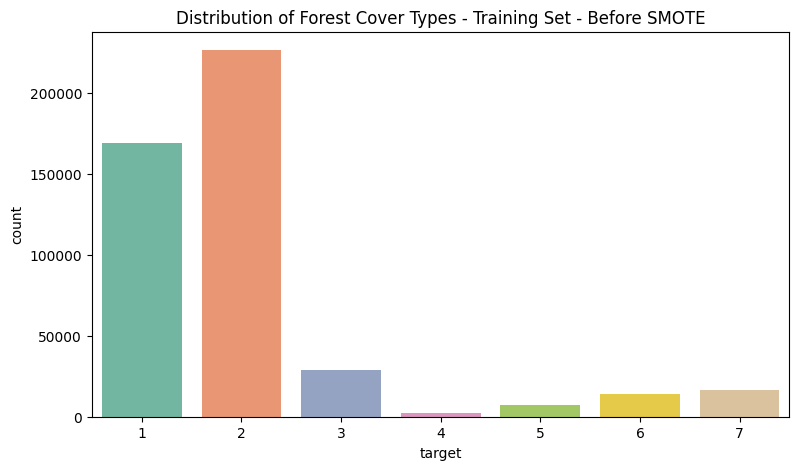

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Data distribution
# Visualizing the distribution of the target variable

plt.figure(figsize=(9, 5))
sns.countplot(x='target', data=pd.DataFrame({'target': y_train}),palette = "Set2")
plt.title('Distribution of Forest Cover Types - Training Set - Before SMOTE')
plt.show()

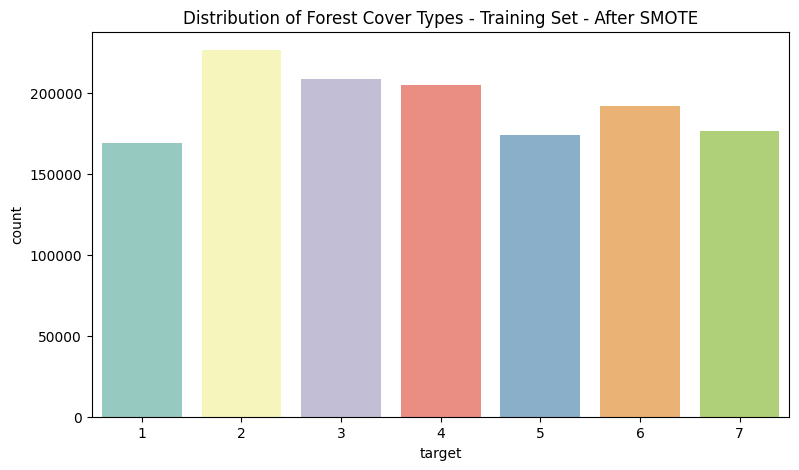

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Data distribution
# Visualizing the distribution of the target variable
plt.figure(figsize=(9, 5))
sns.countplot(x='target', data=pd.DataFrame({'target': y_train_resampled}),palette = "Set3")
plt.title('Distribution of Forest Cover Types - Training Set - After SMOTE')
plt.show()

In [14]:
#Defining final pre-processed variables for ease of training

X_train_data = X_train_scaled
X_test_data = X_test_scaled
y_train_data = y_train_resampled
y_test_data = y_test

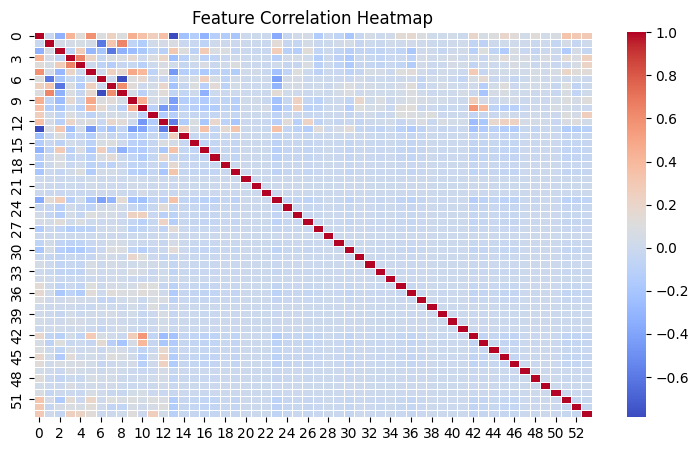

In [15]:
# Feature correlations
# Heatmap visualizes the correlation matrix - where each cell represents the correlation coefficient between two features

correlation_matrix = pd.DataFrame(X_train_data).corr()
plt.figure(figsize=(9, 5))
sns.heatmap(correlation_matrix, cmap="coolwarm", annot=False, fmt=".2f", linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.show()

# Gradient Descent

In [16]:
class gradient_Descent:
    def __init__(self, X, y, X_test, y_test):
        self.X = X
        self.y = y
        self.X_test = X_test
        self.y_test = y_test
    def softmax(self, x):
        exp_numer = np.exp(x - np.max(x, axis=1, keepdims=True))
        # print(exp_numer)
        # print(np.sum(exp_numer, axis=1, keepdims=True))
        return exp_numer / np.sum(exp_numer, axis=1, keepdims=True)

    def cross_entropy_loss(self, y_true, y_pred):
         # Small epsilon value to prevent log(0)
        epsilon = 1e-10
         # Clip values to prevent log(0) or log(1)
        y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
        return -np.mean(np.sum(y_true * np.log(y_pred), axis=1))

    def gradient_descent(self, learning_rate, num_epochs):
        num_samples, num_features = self.X.shape
        # num_classes = len(np.unique(self.y))
        num_classes = np.max(self.y) + 1

        # Initialize weights and biases
        weights = np.random.rand(num_features, num_classes)
        biases = np.zeros(num_classes)

        # One-hot encode the target variable
        y_one_hot = np.eye(int(num_classes))[self.y]

        # Gradient Descent
        for epoch in range(num_epochs):
            # Forward pass
            logits = np.dot(self.X, weights) + biases
            probabilities = self.softmax(logits)

            # Backward pass
            gradient_weights = np.dot(self.X.T, (probabilities - y_one_hot)) / num_samples
            gradient_biases = np.mean(probabilities - y_one_hot, axis=0)

            # Update parameters
            weights -= learning_rate * gradient_weights
            biases -= learning_rate * gradient_biases

            # Calculate and print the training loss
            loss = self.cross_entropy_loss(y_one_hot, probabilities)
            print(f"Epoch {epoch + 1}/{num_epochs}, Loss: {loss}")

        return weights, biases

    def train(self):
        trained_weights, trained_biases = self.gradient_descent(learning_rate=0.01, num_epochs=100)

        return trained_weights, trained_biases

    def test(self, trained_weights, trained_biases):
        # Make predictions on the test set
        test_logits = np.dot(self.X_test, trained_weights) + trained_biases
        test_probabilities = self.softmax(test_logits)
        test_predictions = np.argmax(test_probabilities, axis=1)

        # Evaluate the model (e.g., accuracy, confusion matrix)
        accuracy = accuracy_score(self.y_test, test_predictions)
        print(f"Accuracy on the test set with gradient descent optimization: {accuracy}")

        return accuracy

In [17]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

optimizer_before = gradient_Descent(X_train_before, y_train_before, X_test_before, y_test_before)
optimizer_smote = gradient_Descent(X_train_data, y_train_data, X_test_data, y_test_data)
optimizer_pca = gradient_Descent(X_train_pca, y_train_pca, X_test_pca, y_test_pca)

trained_weights_before, trained_biases_before = optimizer_before.train()
trained_weights_smote, trained_biases_smote = optimizer_smote.train()
trained_weights_pca, trained_biases_pca = optimizer_pca.train()

accuracy_gradient_before = optimizer_before.test(trained_weights_before, trained_biases_before)
accuracy_gradient_smote = optimizer_smote.test(trained_weights_smote, trained_biases_smote)
accuracy_gradient_pca = optimizer_pca.test(trained_weights_pca, trained_biases_pca)

# Print the metrics
print(f"Accuracy before pre-processing: {accuracy_gradient_before * 100:.2f}%")
print(f"Accuracy after smote: {accuracy_gradient_smote * 100:.2f}%")
print(f"Accuracy after pca: {accuracy_gradient_pca * 100:.2f}%")

Epoch 1/100, Loss: 3.1759552167183656
Epoch 2/100, Loss: 3.168336593998862
Epoch 3/100, Loss: 3.160742616155052
Epoch 4/100, Loss: 3.153173255511556
Epoch 5/100, Loss: 3.1456284835642734
Epoch 6/100, Loss: 3.138108270969381
Epoch 7/100, Loss: 3.1306125875329447
Epoch 8/100, Loss: 3.123141402201171
Epoch 9/100, Loss: 3.1156946830512924
Epoch 10/100, Loss: 3.1082723972831596
Epoch 11/100, Loss: 3.1008745112115004
Epoch 12/100, Loss: 3.0935009902589385
Epoch 13/100, Loss: 3.086151798949715
Epoch 14/100, Loss: 3.0788269009042075
Epoch 15/100, Loss: 3.071526258834199
Epoch 16/100, Loss: 3.0642498345389666
Epoch 17/100, Loss: 3.056997588902156
Epoch 18/100, Loss: 3.0497694818895096
Epoch 19/100, Loss: 3.0425654725474067
Epoch 20/100, Loss: 3.03538551900226
Epoch 21/100, Loss: 3.028229578460768
Epoch 22/100, Loss: 3.021097607211025
Epoch 23/100, Loss: 3.0139895606245077
Epoch 24/100, Loss: 3.006905393158907
Epoch 25/100, Loss: 2.999845058361857
Epoch 26/100, Loss: 2.992808508875516
Epoch 27/1

# Logistic Regression

In [18]:
print(X_train_pca.shape)
print(X_test_pca.shape)
print(y_train_pca.shape)
print(y_test_pca.shape)

(464809, 10)
(116203, 10)
(464809,)
(116203,)


In [19]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Create and train the logistic regression model
logreg_model_before = LogisticRegression(max_iter=50, random_state=42)
logreg_model_before.fit(X_train_before, y_train_before)
# Predictions on the test set
y_pred_logreg_before = logreg_model_before.predict(X_test_before)

# Create and train the logistic regression model
logreg_model_smote = LogisticRegression(max_iter=50, random_state=42)
logreg_model_smote.fit(X_train_data, y_train_data)

# Predictions on the test set
y_pred_logreg_smote = logreg_model_smote.predict(X_test_data)

# Evaluate the model
accuracy_logreg_before = accuracy_score(y_test_before, y_pred_logreg_before)
precision_logreg_before = precision_score(y_test_before, y_pred_logreg_before, average='weighted')
recall_logreg_before = recall_score(y_test_before, y_pred_logreg_before, average='weighted')
f1_logreg_before = f1_score(y_test_before, y_pred_logreg_before, average='weighted')

# Print the metrics
print(f"Logistic Regression Test Accuracy before: {accuracy_logreg_before * 100:.2f}%")
print(f"Logistic Regression Precision before: {precision_logreg_before:.2f}")
print(f"Logistic Regression Recall before: {recall_logreg_before:.2f}")
print(f"Logistic Regression F1 Score before: {f1_logreg_before:.2f}")

# Confusion Matrix
conf_matrix_logreg_before = confusion_matrix(y_test_before, y_pred_logreg_before)
print("Logistic Regression Confusion Matrix before:")
print(conf_matrix_logreg_before)
# Classification Report
class_report_logreg_before = classification_report(y_test_before, y_pred_logreg_before)
print("Logistic Regression Classification Report before:")
print(class_report_logreg_before)

# Evaluate the model
accuracy_logreg_smote = accuracy_score(y_test_data, y_pred_logreg_smote)
precision_logreg_smote = precision_score(y_test_data, y_pred_logreg_smote, average='weighted')
recall_logreg_smote = recall_score(y_test_data, y_pred_logreg_smote, average='weighted')
f1_logreg_smote = f1_score(y_test_data, y_pred_logreg_smote, average='weighted')

# Print the metrics
print(f"Logistic Regression Test Accuracy after smote: {accuracy_logreg_smote * 100:.2f}%")
print(f"Logistic Regression Precision after smote: {precision_logreg_smote:.2f}")
print(f"Logistic Regression Recall after smote: {recall_logreg_smote:.2f}")
print(f"Logistic Regression F1 Score after smote: {f1_logreg_smote:.2f}")
# Confusion Matrix
conf_matrix_logreg_smote = confusion_matrix(y_test_data, y_pred_logreg_smote)
print("Logistic Regression Confusion Matrix after smote:")
print(conf_matrix_logreg_smote)
# Classification Report
class_report_logreg_smote = classification_report(y_test_data, y_pred_logreg_smote)
print("Logistic Regression Classification Report after smote:")
print(class_report_logreg_smote)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Logistic Regression Test Accuracy before: 72.28%
Logistic Regression Precision before: 0.71
Logistic Regression Recall before: 0.72
Logistic Regression F1 Score before: 0.71
Logistic Regression Confusion Matrix before:
[[29644 12009     9     0     1    19   875]
 [10178 45304   691     4    35   258    30]
 [    0   701  5830   169     5   416     0]
 [    0     1   297   172     0    56     0]
 [   10  1904    66     0     6     9     0]
 [    0   824  1894    33     8   730     0]
 [ 1675    39     0     0     0     0  2301]]
Logistic Regression Classification Report before:
              precision    recall  f1-score   support

           1       0.71      0.70      0.71     42557
           2       0.75      0.80      0.77     56500
           3       0.66      0.82      0.73      7121
           4       0.46      0.33      0.38       526
           5       0.11      0.00      0.01      1995
           6       0.49      0.21      0.29      3489
           7       0.72      0.57   

# Decision Tree

In [20]:
# Import necessary libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

# Create a Decision Tree Classifier
dt_model_before = DecisionTreeClassifier(random_state=42)
dt_model_smote = DecisionTreeClassifier(random_state=42)
dt_model_pca = DecisionTreeClassifier(random_state=42)

# Train the model
dt_model_before.fit(X_train_before, y_train_before)
dt_model_smote.fit(X_train_data, y_train_data)
dt_model_pca.fit(X_train_pca, y_train_pca)

# Make predictions on the test set
y_pred_before = dt_model_before.predict(X_test_before)
y_pred_smote = dt_model_smote.predict(X_test_data)
y_pred_pca = dt_model_pca.predict(X_test_pca)

# Evaluate the model
accuracy_before = accuracy_score(y_test_before, y_pred_before)
classification_report_result_before = classification_report(y_test_before, y_pred_before)
# Print the results
print(f"Accuracy: {accuracy_before:.2f}")
print("Classification Report:\n", classification_report_result_before)

# Evaluate the model
accuracy_smote = accuracy_score(y_test_data, y_pred_smote)
classification_report_result_smote = classification_report(y_test_data, y_pred_smote)
# Print the results
print(f"Accuracy: {accuracy_smote:.2f}")
print("Classification Report:\n", classification_report_result_smote)

# Evaluate the model
accuracy_pca = accuracy_score(y_test_pca, y_pred_pca)
classification_report_result_pca = classification_report(y_test_pca, y_pred_pca)
# Print the results
print(f"Accuracy: {accuracy_pca:.2f}")
print("Classification Report:\n", classification_report_result_pca)


Accuracy: 0.94
Classification Report:
               precision    recall  f1-score   support

           1       0.94      0.94      0.94     42557
           2       0.95      0.95      0.95     56500
           3       0.93      0.93      0.93      7121
           4       0.85      0.81      0.83       526
           5       0.84      0.83      0.83      1995
           6       0.88      0.89      0.88      3489
           7       0.94      0.95      0.95      4015

    accuracy                           0.94    116203
   macro avg       0.90      0.90      0.90    116203
weighted avg       0.94      0.94      0.94    116203

Accuracy: 0.94
Classification Report:
               precision    recall  f1-score   support

           1       0.94      0.93      0.94     42557
           2       0.95      0.94      0.95     56500
           3       0.93      0.94      0.93      7121
           4       0.86      0.85      0.85       526
           5       0.82      0.86      0.84      1995


# Random Forest Classification

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split

# Create a Random Forest classifier
random_forest_classifier_before = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_classifier_smote = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_classifier_pca = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training data
random_forest_classifier_before.fit(X_train_before, y_train_before)
random_forest_classifier_smote.fit(X_train_data, y_train_data)
random_forest_classifier_pca.fit(X_train_pca, y_train_pca)

# Make predictions on the test data
predictions_before = random_forest_classifier_before.predict(X_test_before)
predictions_smote = random_forest_classifier_smote.predict(X_test_data)
predictions_pca = random_forest_classifier_pca.predict(X_test_pca)

# Evaluate the model
accuracy_before = accuracy_score(y_test_before, predictions_before)
precision_before = precision_score(y_test_before, predictions_before, average='weighted')
recall_before = recall_score(y_test_before, predictions_before, average='weighted')
f1_before = f1_score(y_test_before, predictions_before, average='weighted')
conf_matrix_before = confusion_matrix(y_test_before, predictions_before)
class_report_before = classification_report(y_test_before, predictions_before)
# Print the metrics
print(f"Accuracy: {accuracy_before * 100:.2f}%")
print(f"Precision: {precision_before:.2f}")
print(f"Recall: {recall_before:.2f}")
print(f"F1 Score: {f1_before:.2f}")
print("Confusion Matrix:")
print(conf_matrix_before)

# Evaluate the model
accuracy_smote = accuracy_score(y_test_data, predictions_smote)
precision_smote = precision_score(y_test_data, predictions_smote, average='weighted')
recall_smote = recall_score(y_test_data, predictions_smote, average='weighted')
f1_smote = f1_score(y_test_data, predictions_smote, average='weighted')
conf_matrix_smote = confusion_matrix(y_test_data, predictions_smote)
class_report_smote = classification_report(y_test_data, predictions_smote)
# Print the metrics
print(f"Accuracy: {accuracy_smote * 100:.2f}%")
print(f"Precision: {precision_smote:.2f}")
print(f"Recall: {recall_smote:.2f}")
print(f"F1 Score: {f1_smote:.2f}")
print("Confusion Matrix:")
print(conf_matrix_smote)

# Evaluate the model
accuracy_pca = accuracy_score(y_test_pca, predictions_pca)
precision_pca = precision_score(y_test_pca, predictions_pca, average='weighted')
recall_pca = recall_score(y_test_pca, predictions_pca, average='weighted')
f1_pca = f1_score(y_test_pca, predictions_pca, average='weighted')
conf_matrix_pca = confusion_matrix(y_test_pca, predictions_pca)
class_report_pca = classification_report(y_test_pca, predictions_pca)
# Print the metrics
print(f"Accuracy: {accuracy_pca * 100:.2f}%")
print(f"Precision: {precision_pca:.2f}")
print(f"Recall: {recall_pca:.2f}")
print(f"F1 Score: {f1_pca:.2f}")
print("Confusion Matrix:")
print(conf_matrix_pca)


Accuracy: 95.51%
Precision: 0.96
Recall: 0.96
F1 Score: 0.95
Confusion Matrix:
[[40160  2299     0     0     9     2    87]
 [ 1237 55015    96     0    76    62    14]
 [    2    98  6867    23     6   125     0]
 [    0     0    66   445     0    15     0]
 [   28   401    17     0  1537    12     0]
 [    1   107   228    19     5  3129     0]
 [  153    25     0     0     0     0  3837]]
Accuracy: 95.79%
Precision: 0.96
Recall: 0.96
F1 Score: 0.96
Confusion Matrix:
[[40133  2219     5     0    35     6   159]
 [ 1172 54809   166     0   192   135    26]
 [    2    44  6901    32     8   134     0]
 [    0     0    49   464     0    13     0]
 [   11   165    11     0  1800     8     0]
 [    1    30   151    21     5  3281     0]
 [   82    12     0     0     1     0  3920]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 50.75%
Precision: 0.50
Recall: 0.51
F1 Score: 0.49
Confusion Matrix:
[[28829 13664     5     0     0     0    59]
 [28918 27006   248     0     0   262    66]
 [  136  3829  2574    61     0   519     2]
 [    0   167   268    25     0    66     0]
 [  525  1469     0     0     0     1     0]
 [  156  1879   933     1     0   520     0]
 [ 3137   857     0     0     0     0    21]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Ada Boost Classifier

In [22]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# Create an AdaBoost classifier
adaboost_classifier_before = AdaBoostClassifier(n_estimators=50, random_state=42)
adaboost_classifier_smote = AdaBoostClassifier(n_estimators=50, random_state=42)
adaboost_classifier_pca = AdaBoostClassifier(n_estimators=50, random_state=42)

# Train the classifier on the training data
adaboost_classifier_before.fit(X_train_before, y_train_before)
adaboost_classifier_smote.fit(X_train_data, y_train_data)
adaboost_classifier_pca.fit(X_train_pca, y_train_pca)

# Make predictions on the test data
predictions_before = adaboost_classifier_before.predict(X_test_before)
predictions_smote = adaboost_classifier_smote.predict(X_test_data)
predictions_pca = adaboost_classifier_pca.predict(X_test_pca)

# Evaluate the model
accuracy_before = accuracy_score(y_test_before, predictions_before)
precision_before = precision_score(y_test_before, predictions_before, average='weighted')
recall_before = recall_score(y_test_before, predictions_before, average='weighted')
f1_before = f1_score(y_test_before, predictions_before, average='weighted')
conf_matrix_before = confusion_matrix(y_test_before, predictions_before)
class_report_before = classification_report(y_test_before, predictions_before)
# Print the metrics
print(f"Accuracy: {accuracy_before* 100:.2f}%")
print(f"Precision: {precision_before:.2f}")
print(f"Recall: {recall_before:.2f}")
print(f"F1 Score: {f1_before:.2f}")
print("Confusion Matrix:")
print(conf_matrix_before)
print("Classification Report:")
print(class_report_before)

# Evaluate the model
accuracy_smote = accuracy_score(y_test_data, predictions_smote)
precision_smote = precision_score(y_test_data, predictions_smote, average='weighted')
recall_smote = recall_score(y_test_data, predictions_smote, average='weighted')
f1_smote = f1_score(y_test_data, predictions_smote, average='weighted')
conf_matrix_smote = confusion_matrix(y_test_data, predictions_smote)
class_report_smote = classification_report(y_test_data, predictions_smote)
# Print the metrics
print(f"Accuracy: {accuracy_smote* 100:.2f}%")
print(f"Precision: {precision_smote:.2f}")
print(f"Recall: {recall_smote:.2f}")
print(f"F1 Score: {f1_smote:.2f}")
print("Confusion Matrix:")
print(conf_matrix_smote)
print("Classification Report:")
print(class_report_smote)

# Evaluate the model
accuracy_pca = accuracy_score(y_test_pca, predictions_pca)
precision_pca = precision_score(y_test_pca, predictions_pca, average='weighted')
recall_pca = recall_score(y_test_pca, predictions_pca, average='weighted')
f1_pca = f1_score(y_test_pca, predictions_pca, average='weighted')
conf_matrix_pca = confusion_matrix(y_test_pca, predictions_pca)
class_report_pca = classification_report(y_test_pca, predictions_pca)
# Print the metrics
print(f"Accuracy: {accuracy_pca* 100:.2f}%")
print(f"Precision: {precision_pca:.2f}")
print(f"Recall: {recall_pca:.2f}")
print(f"F1 Score: {f1_pca:.2f}")
print("Confusion Matrix:")
print(conf_matrix_pca)
print("Classification Report:")
print(class_report_pca)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:13

Accuracy: 47.50%
Precision: 0.58
Recall: 0.47
F1 Score: 0.45
Confusion Matrix:
[[33756  3947   145     0     0   193  4516]
 [30506 16725  1028     0     2  5590  2649]
 [   74   367   634     0     0  6045     1]
 [    0     0     0     0     0   526     0]
 [  251  1478    55     0     1   193    17]
 [   50   208   126     0     0  3105     0]
 [ 3043     0     1     0     0     0   971]]
Classification Report:
              precision    recall  f1-score   support

           1       0.50      0.79      0.61     42557
           2       0.74      0.30      0.42     56500
           3       0.32      0.09      0.14      7121
           4       0.00      0.00      0.00       526
           5       0.33      0.00      0.00      1995
           6       0.20      0.89      0.32      3489
           7       0.12      0.24      0.16      4015

    accuracy                           0.47    116203
   macro avg       0.31      0.33      0.24    116203
weighted avg       0.58      0.47      0

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 34.54%
Precision: 0.60
Recall: 0.35
F1 Score: 0.39
Confusion Matrix:
[[ 8141  9570   286     0  6048   319 18193]
 [ 3897 23485  1943     0 14812  5829  6534]
 [    0   161  1599     0   208  5153     0]
 [    0     0     0     0     0   526     0]
 [   12   520    63     0  1132   268     0]
 [    0   101   681     0   125  2582     0]
 [  812     1     0     0     1     0  3201]]
Classification Report:
              precision    recall  f1-score   support

           1       0.63      0.19      0.29     42557
           2       0.69      0.42      0.52     56500
           3       0.35      0.22      0.27      7121
           4       0.00      0.00      0.00       526
           5       0.05      0.57      0.09      1995
           6       0.18      0.74      0.28      3489
           7       0.11      0.80      0.20      4015

    accuracy                           0.35    116203
   macro avg       0.29      0.42      0.24    116203
weighted avg       0.60      0.35      0

# Multi Layer Perceptron with Model Regularization (L2)

In [23]:
from sklearn.neural_network import MLPClassifier

ann_clf_before = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=42)
ann_clf_before.fit(X_train_before, y_train_before)
y_pred_before = ann_clf_before.predict(X_test_before)

ann_clf_smote = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=42)
ann_clf_smote.fit(X_train_data, y_train_data)
y_pred_smote = ann_clf_smote.predict(X_test_data)

ann_clf_pca = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=42)
ann_clf_pca.fit(X_train_pca, y_train_pca)
y_pred_pca = ann_clf_pca.predict(X_test_pca)

# Accuracy
accuracy_before = accuracy_score(y_test_before, y_pred_before)
print(f"Accuracy of MCP Classifier Before Pre-processing: {accuracy_before}")
# Precision
precision_before = precision_score(y_test_before, y_pred_before, average='weighted')
print(f"Precision of MCP Classifier Before Pre-processing: {precision_before}")
# Recall
recall_before = recall_score(y_test_before, y_pred_before, average='weighted')
print(f"Recall of MCP Classifier Before Pre-processing: {recall_before}")
# F1 Score
f1_before = f1_score(y_test_before, y_pred_before, average='weighted')
print(f"F1 Score of MCP Classifier Before Pre-processing: {f1_before}")
# Confusion Matrix
conf_matrix_before = confusion_matrix(y_test_before, y_pred_before)
print("Confusion Matrix of MCP Classifier Before Pre-processing:")
print(conf_matrix_before)

# Accuracy
accuracy_smote = accuracy_score(y_test_data, y_pred_smote)
print(f"Accuracy of MCP Classifier After SMOTE: {accuracy_smote}")
# Precision
precision_smote = precision_score(y_test_data, y_pred_smote, average='weighted')
print(f"Precision of MCP Classifier After SMOTE: {precision_smote}")
# Recall
recall_smote = recall_score(y_test_data, y_pred_smote, average='weighted')
print(f"Recall of MCP Classifier After SMOTE: {recall_smote}")
# F1 Score
f1_smote = f1_score(y_test_data, y_pred_smote, average='weighted')
print(f"F1 Score of MCP Classifier After SMOTE: {f1_smote}")
# Confusion Matrix
conf_matrix_smote = confusion_matrix(y_test_data, y_pred_smote)
print("Confusion Matrix of MCP Classifier After SMOTE:")
print(conf_matrix_smote)


# Accuracy
accuracy_pca = accuracy_score(y_test_pca, y_pred_pca)
print(f"Accuracy of MCP Classifier After PCA: {accuracy_pca}")
# Precision
precision_pca = precision_score(y_test_pca, y_pred_pca, average='weighted')
print(f"Precision of MCP Classifier After PCA: {precision_pca}")
# Recall
recall_pca = recall_score(y_test_pca, y_pred_pca, average='weighted')
print(f"Recall of MCP Classifier After PCA: {recall_pca}")
# F1 Score
f1_pca = f1_score(y_test_pca, y_pred_pca, average='weighted')
print(f"F1 Score of MCP Classifier After PCA: {f1_pca}")
# Confusion Matrix
conf_matrix_pca = confusion_matrix(y_test_pca, y_pred_pca)
print("Confusion Matrix of MCP Classifier After PCA:")
print(conf_matrix_pca)


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS R

Accuracy of MCP Classifier Before Pre-processing: 0.7278555631093861
Precision of MCP Classifier Before Pre-processing: 0.6955917128060388
Recall of MCP Classifier Before Pre-processing: 0.7278555631093861
F1 Score of MCP Classifier Before Pre-processing: 0.7085155489944287
Confusion Matrix of MCP Classifier Before Pre-processing:
[[30641 11134    64     0     0     0   718]
 [ 9999 44926  1544     0     0     0    31]
 [    0   473  6648     0     0     0     0]
 [    0     0   526     0     0     0     0]
 [    0  1809   186     0     0     0     0]
 [    3   898  2588     0     0     0     0]
 [ 1615    24    12     0     0     0  2364]]
Accuracy of MCP Classifier After SMOTE: 0.5772828584459954
Precision of MCP Classifier After SMOTE: 0.6581237664641459
Recall of MCP Classifier After SMOTE: 0.5772828584459954
F1 Score of MCP Classifier After SMOTE: 0.6020227182815242
Confusion Matrix of MCP Classifier After SMOTE:
[[24809 10661    21     0   734    97  6235]
 [12483 31787   862    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Confusion Matrix of MCP Classifier After PCA:
[[22506 17816     1     0     0     0  2234]
 [20541 33211   809    30     0     0  1909]
 [   16  2708  4397     0     0     0     0]
 [    0     7   519     0     0     0     0]
 [  178  1803     0     0     0     0    14]
 [   21  1266  2201     0     0     0     1]
 [ 2658   548     0     0     0     0   809]]


# Results and Observation



*   A Dataset of a large size such as this requires pre-processing such as data balancing and Normalization patently

*   Oversampling the dataset with a random gamma factor proves essential to induce generalisability

*  Although we have more accuracy for Random Forest, I am comparing the F1 score and not accuracy.

*  Decision Tree Classifier after over-sampling proves to be the best amongst machine learning and deep learning methods

*   Principal Component Analysis is an efficient technique only if accuracy is not principal.







